<b>Conversion Fraud in Digital Advertising</b>

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas.api.types import is_string_dtype
from warnings import filterwarnings

filterwarnings('ignore')
pd.options.display.max_columns = None
plt.rcParams['figure.figsize'] = [15,10]

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Project/Training Data.csv')
dt = pd.read_csv('/content/drive/MyDrive/Capstone Project/Test Data.csv')

In [6]:
df.shape, dt.shape

((965, 56), (455, 56))

In [7]:
df.head(2)

clientid_cr                               clmbuserid_cr  conversiontime_cr  \
0        75694  31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw       1.620000e+12   
1        75694  4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg       1.620000e+12   

                                    imprid_cr  adslotdimid_cr  algo_cr  \
0  01649076-c77f-4d70-afc8-213535427147-1sjd4          321300     38.0   
1  f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw          129239     38.0   

      audiences_cr  clickbid_cr  geodimid_cr            ip_cr  \
0          8gw,o3b     2.869316          144  XXX.XXX.XXX.XXX   
1  8kv,2vk,8gw,2vl     2.790000          144  XXX.XXX.XXX.XXX   

   itemcolumbiaid_cr  itemid_cr  position_cr  pubclientid_cr  \
0            5488088   49504155          1.0            2320   
1            5488773   49504157          1.0           15240   

                                           refurl_cr  siteId_cr  \
0  https%3A%2F%2Fwww.timesjobs.com%2Fcandidate%2F...         34   
1  https%3A%2F%2Fwww.cricbuzz.com%2Flive-cricket-...        178   

   templateid_cr  goalid_cr       time_cr  adLogType_cr  v_cr  \
0         4140.0       6384  1.620000e+12             2   1.0   
1          663.0       6384  1.620000e+12             2   1.0   

                                     allAudiences_cr  pricingtype_cr  \
0  7dn,6hs,35g,ome,omf,l32,nqo,2ws,qqo,lo4,oos,2w...              16   
1  h9r,35j,7dx,592,lo4,5o2,gau,75y,k8l,2ve,k8p,8k...              16   

    osId_cr  browserId_cr  cityId_cr  stateId_cr  modelDimId_cr  \
0  196058.0      129639.0      436.0      1806.0       202038.0   
1  196058.0      129639.0    10314.0      1817.0       202038.0   

   lookUpFrom_cr connTypeDimId_cr  ispDimId_cr  countryDimId_cr  \
0              2           264496     280429.0            144.0   
1              2           264496     136127.0            144.0   

   goalTypeId_cr  conversionDurationInMillis_cr  impressionTimeInMillis_cr  \
0             10                         2332.0               1.620000e+12   
1             10                         3201.0               1.620000e+12   

   clickTimeInMillis_cr  osVerDimId_cr  uuidSource_cr  geoGrpDimId_cr  \
0          1.620000e+12       199452.0            1.0        348011.0   
1          1.620000e+12       199452.0            1.0        348011.0   

   stateGrpDimId_cr  deviceId_cr  uvh_cr  uv_cr  platformId_cr sdkVersion_cr  \
0          348022.0          NaN     NaN    NaN            NaN           NaN   
1          348024.0          NaN     NaN    NaN            NaN           NaN   

  usrClusterId_cr  cityGrpDimId_cr siteClusterIds_cr  refClusterId_cr  \
0          333495         348007.0               NaN              NaN   
1             NaN         348010.0               NaN              NaN   

   paid_cr  spend_cr  attributionType_cr conversionid_cr optimize_on_cr  \
0      NaN       NaN                 NaN             NaN            NaN   
1      NaN       NaN                 NaN             NaN            NaN   

   bundleId_cr  conversion_fraud  
0          NaN              True  
1          NaN              True

In [ ]:
dt.head(2)

record_id  clientid_cr                               clmbuserid_cr  \
0       1000        82122   1045e8b8-662e-49b3-bc4a-4af5326c8236-62kw   
1       1001        75694  53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0   

   conversiontime_cr                                   imprid_cr  \
0      1620000000000  864cdaf0-cca7-4bcc-b210-a33858cf8755-1siz8   
1      1620000000000  6c44c171-9445-4e6b-856e-89bfcd0be22c-1sito   

   adslotdimid_cr  algo_cr audiences_cr  clickbid_cr  geodimid_cr  \
0          233531       38          NaN          NaN          145   
1          356952       20          NaN          3.1          144   

             ip_cr  itemcolumbiaid_cr  itemid_cr  position_cr  pubclientid_cr  \
0  XXX.XXX.XXX.XXX            5526656   53184285            3            2658   
1  XXX.XXX.XXX.XXX            5488773   49504162            1           85030   

                                           refurl_cr  siteId_cr  \
0  https%3A%2F%2Ftimesofindia.indiatimes.com%2Fworld          3   
1                        https%3A%2F%2Fwww.olx.in%2F       3290   

   templateid_cr  goalid_cr        time_cr  adLogType_cr  v_cr  \
0         2946.0       8628  1620000000000             1     1   
1         5167.0       6384  1620000000000             2     1   

                                     allAudiences_cr  pricingtype_cr  osId_cr  \
0                                            9nj,8qu              16   196061   
1  oy5,oy7,mgg,oy9,pus,lo4,p12,ps3,oos,p16,oou,o1...              16   196063   

   browserId_cr  cityId_cr  stateId_cr  modelDimId_cr  lookUpFrom_cr  \
0             0          0        2442              0              1   
1        129639      10278        1808         202038              2   

   connTypeDimId_cr  ispDimId_cr  countryDimId_cr  goalTypeId_cr  \
0            264494       265618              145             10   
1            264496       280429              144             10   

   conversionDurationInMillis_cr  impressionTimeInMillis_cr  \
0                         369206              1620000000000   
1                           2298              1620000000000   

   clickTimeInMillis_cr  osVerDimId_cr  uuidSource_cr  geoGrpDimId_cr  \
0                   NaN              0              1          348012   
1          1.620000e+12         199414              1          348011   

   stateGrpDimId_cr  deviceId_cr  uvh_cr       uv_cr  platformId_cr  \
0               NaN     196047.0     NaN  42860785.0            1.0   
1          348020.0          NaN     NaN         NaN            NaN   

  sdkVersion_cr  usrClusterId_cr  cityGrpDimId_cr  siteClusterIds_cr  \
0           NaN              NaN              NaN       3.337341e+17   
1           NaN              NaN         348006.0                NaN   

   refClusterId_cr  paid_cr  spend_cr  attributionType_cr conversionid_cr  \
0              NaN      NaN       NaN                 NaN             NaN   
1              NaN      NaN       NaN                 NaN             NaN   

  optimize_on_cr  bundleId_cr  
0            NaN          NaN  
1            NaN          NaN

we'll do some EDA Process on the training data.


**Checking if the dependent variable is balanced**



Text(0.9, 136, '13.58%')

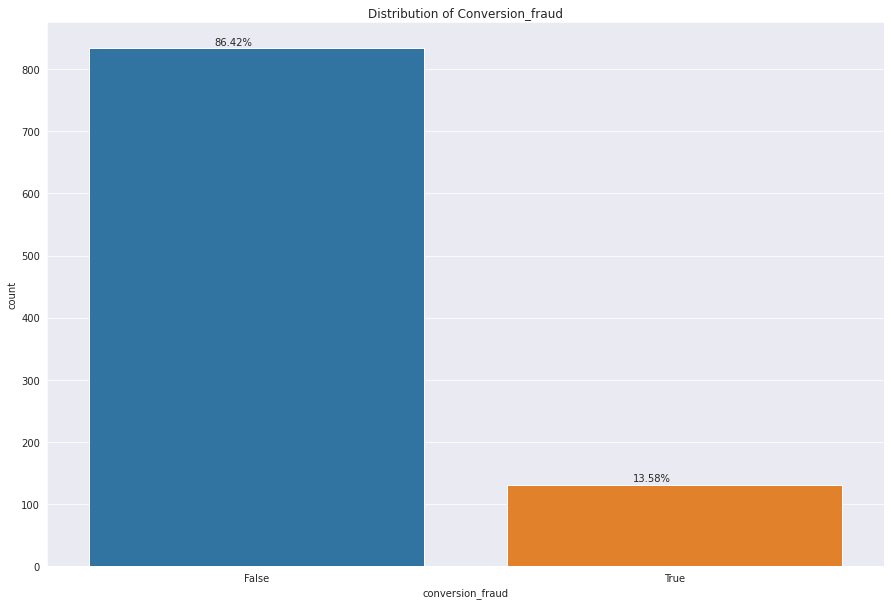

In [8]:
import seaborn as sns
sns.set_style('darkgrid')
sns.countplot(df['conversion_fraud'])
plt.title('Distribution of Conversion_fraud') 
df['conversion_fraud']= [1 if i == True else 0 for i in df['conversion_fraud'] ]
a = round(df['conversion_fraud'].value_counts()[0].sum()* 100/df['conversion_fraud'].value_counts().sum(),2)
b = round(df['conversion_fraud'].value_counts()[1].sum()* 100/df['conversion_fraud'].value_counts().sum(),2)

plt.text(x=-0.1,y= df['conversion_fraud'].value_counts()[0] +5, s= str(a)+'%' )
plt.text(x=0.9,y= df['conversion_fraud'].value_counts()[1] +5, s= str(b)+'%' )

from the above plot we see that the data is highly imbalance. We will still be using the same data and not be applying any resampling here

We'll remove the "record_id" from the test data and the target variable that is conversion_fraud from the train data and combine both the data sets for feature engineering. 

In [9]:
target = df['conversion_fraud']
df = df.drop(['conversion_fraud'],axis=1)
dt = dt.drop(['record_id'], axis = 1)

combined_data = df.append(dt)

In [10]:
combined_data.shape

(1420, 55)

In [11]:
info = pd.DataFrame()
info['DataType'] = combined_data.dtypes
info['Unique_Values'] = combined_data.nunique()

In [12]:
info.sort_values(by = ['Unique_Values'],ascending=True)

DataType  Unique_Values
uvh_cr                         float64              0
conversiontime_cr              float64              1
attributionType_cr             float64              1
paid_cr                        float64              1
optimize_on_cr                  object              1
time_cr                        float64              1
goalTypeId_cr                    int64              1
ip_cr                           object              1
impressionTimeInMillis_cr      float64              2
adLogType_cr                     int64              2
clickTimeInMillis_cr           float64              2
v_cr                           float64              2
lookUpFrom_cr                    int64              2
platformId_cr                  float64              3
pricingtype_cr                   int64              3
deviceId_cr                    float64              3
sdkVersion_cr                   object              4
bundleId_cr                    float64              4
uuidSource_cr                  float64              6
cityGrpDimId_cr                float64              6
conversionid_cr                 object              6
geoGrpDimId_cr                 float64              7
stateGrpDimId_cr               float64              8
geodimid_cr                      int64             10
countryDimId_cr                float64             10
browserId_cr                   float64             12
algo_cr                        float64             12
connTypeDimId_cr                object             16
osId_cr                        float64             18
uv_cr                          float64             26
modelDimId_cr                  float64             27
spend_cr                       float64             28
refClusterId_cr                float64             32
osVerDimId_cr                  float64             39
stateId_cr                     float64             50
pubclientid_cr                   int64             50
clientid_cr                      int64             61
goalid_cr                        int64             61
clickbid_cr                    float64             76
cityId_cr                      float64             92
siteClusterIds_cr               object             96
siteId_cr                        int64             97
itemcolumbiaid_cr                int64            146
templateid_cr                  float64            162
ispDimId_cr                    float64            168
itemid_cr                        int64            210
adslotdimid_cr                   int64            244
position_cr                    float64            245
usrClusterId_cr                 object            291
refurl_cr                       object            550
audiences_cr                    object            632
allAudiences_cr                 object           1207
clmbuserid_cr                   object           1300
conversionDurationInMillis_cr  float64           1360
imprid_cr                       object           1386

In [13]:
#Below are the columns which are actually categorical data but tagged as float datatype
cater = ['cityGrpDimId_cr','templateid_cr','stateGrpDimId_cr','osVerDimId_cr','modelDimId_cr','browserId_cr','ispDimId_cr','countryDimId_cr','osId_cr',
         'cityId_cr','stateId_cr','countryDimId_cr','uuidSource_cr','geoGrpDimId_cr']

for i in cater:
  combined_data[i] = combined_data[i].astype('object')

Before making corrections in the datatype we'll handle the missing values

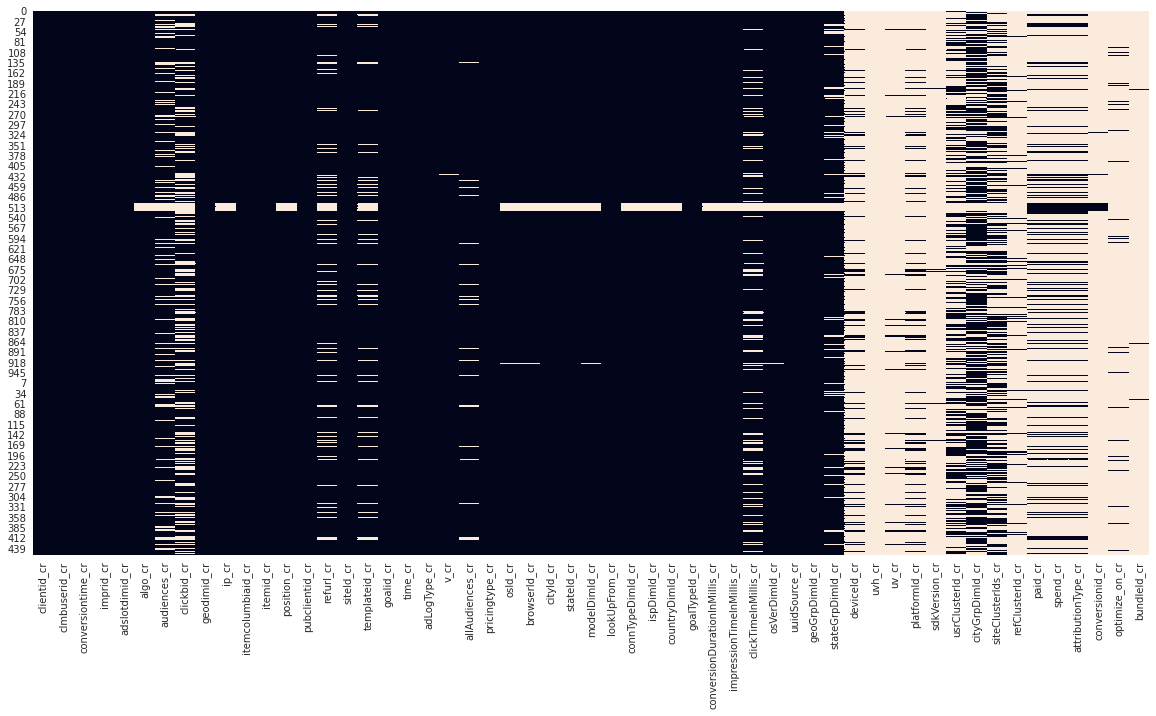

In [14]:
plt.figure(figsize = (20,10))
sns.heatmap(combined_data.isnull(), cbar = False)

In [15]:
tot = combined_data.isnull().sum()
perc = round(combined_data.isnull().sum()*100/combined_data.isnull().count(),2)

In [16]:
missing_data = pd.concat([tot,perc], keys=['Total', 'Percent'], axis=1)
missing_data['Type'] = combined_data.dtypes
missing_data['Unique_records'] = combined_data.nunique()

In [17]:
missing_data.sort_values(by=['Unique_records'], ascending=True)

Total  Percent     Type  Unique_records
uvh_cr                          1420   100.00  float64               0
conversiontime_cr                  0     0.00  float64               1
attributionType_cr              1149    80.92  float64               1
paid_cr                         1149    80.92  float64               1
optimize_on_cr                  1362    95.92   object               1
time_cr                            0     0.00  float64               1
goalTypeId_cr                      0     0.00    int64               1
ip_cr                             20     1.41   object               1
impressionTimeInMillis_cr         20     1.41  float64               2
adLogType_cr                       0     0.00    int64               2
clickTimeInMillis_cr             208    14.65  float64               2
v_cr                               1     0.07  float64               2
lookUpFrom_cr                      0     0.00    int64               2
platformId_cr                   1232    86.76  float64               3
pricingtype_cr                     0     0.00    int64               3
deviceId_cr                     1233    86.83  float64               3
sdkVersion_cr                   1408    99.15   object               4
bundleId_cr                     1413    99.51  float64               4
uuidSource_cr                     20     1.41   object               6
cityGrpDimId_cr                  497    35.00   object               6
conversionid_cr                 1395    98.24   object               6
geoGrpDimId_cr                    20     1.41   object               7
stateGrpDimId_cr                 147    10.35   object               8
geodimid_cr                        0     0.00    int64              10
countryDimId_cr                   20     1.41   object              10
browserId_cr                      21     1.48   object              12
algo_cr                           20     1.41  float64              12
connTypeDimId_cr                  20     1.41   object              16
osId_cr                           21     1.48   object              18
uv_cr                           1373    96.69  float64              26
modelDimId_cr                     21     1.48   object              27
spend_cr                        1149    80.92  float64              28
refClusterId_cr                 1319    92.89  float64              32
osVerDimId_cr                     21     1.48   object              39
stateId_cr                        20     1.41   object              50
pubclientid_cr                     0     0.00    int64              50
clientid_cr                        0     0.00    int64              61
goalid_cr                          0     0.00    int64              61
clickbid_cr                      446    31.41  float64              76
cityId_cr                         20     1.41   object              92
siteClusterIds_cr                803    56.55   object              96
siteId_cr                          0     0.00    int64              97
itemcolumbiaid_cr                  0     0.00    int64             146
templateid_cr                    148    10.42   object             162
ispDimId_cr                       20     1.41   object             168
itemid_cr                          0     0.00    int64             210
adslotdimid_cr                     0     0.00    int64             244
position_cr                       20     1.41  float64             245
usrClusterId_cr                  903    63.59   object             291
refurl_cr                        172    12.11   object             550
audiences_cr                     285    20.07   object             632
allAudiences_cr                   70     4.93   object            1207
clmbuserid_cr                      0     0.00   object            1300
conversionDurationInMillis_cr     20     1.41  float64            1360
imprid_cr                          0     0.00   object            1386

In [18]:
missing_data[missing_data['Total'] > 0].sort_values(by=['Total'], ascending = False)

Total  Percent     Type  Unique_records
uvh_cr                          1420   100.00  float64               0
bundleId_cr                     1413    99.51  float64               4
sdkVersion_cr                   1408    99.15   object               4
conversionid_cr                 1395    98.24   object               6
uv_cr                           1373    96.69  float64              26
optimize_on_cr                  1362    95.92   object               1
refClusterId_cr                 1319    92.89  float64              32
deviceId_cr                     1233    86.83  float64               3
platformId_cr                   1232    86.76  float64               3
paid_cr                         1149    80.92  float64               1
spend_cr                        1149    80.92  float64              28
attributionType_cr              1149    80.92  float64               1
usrClusterId_cr                  903    63.59   object             291
siteClusterIds_cr                803    56.55   object              96
cityGrpDimId_cr                  497    35.00   object               6
clickbid_cr                      446    31.41  float64              76
audiences_cr                     285    20.07   object             632
clickTimeInMillis_cr             208    14.65  float64               2
refurl_cr                        172    12.11   object             550
templateid_cr                    148    10.42   object             162
stateGrpDimId_cr                 147    10.35   object               8
allAudiences_cr                   70     4.93   object            1207
browserId_cr                      21     1.48   object              12
osVerDimId_cr                     21     1.48   object              39
modelDimId_cr                     21     1.48   object              27
osId_cr                           21     1.48   object              18
impressionTimeInMillis_cr         20     1.41  float64               2
ip_cr                             20     1.41   object               1
position_cr                       20     1.41  float64             245
stateId_cr                        20     1.41   object              50
cityId_cr                         20     1.41   object              92
conversionDurationInMillis_cr     20     1.41  float64            1360
connTypeDimId_cr                  20     1.41   object              16
ispDimId_cr                       20     1.41   object             168
countryDimId_cr                   20     1.41   object              10
geoGrpDimId_cr                    20     1.41   object               7
uuidSource_cr                     20     1.41   object               6
algo_cr                           20     1.41  float64              12
v_cr                               1     0.07  float64               2

In [19]:
missing_data.iloc[:1]

Total  Percent   Type  Unique_records
clientid_cr      0      0.0  int64              61

By considering a threshold of 50% we'll drop all the cols which has more than 50% of the data missing.

In [20]:
data1 = missing_data[missing_data['Percent'] > 50]  

In [21]:
col = data1.index

In [22]:
for i in col:
  combined_data = combined_data.drop([i], axis=1)

  

In [23]:
combined_data.shape

(1420, 41)

In [24]:
combined_data.isnull().sum().sort_values(ascending=False)

cityGrpDimId_cr                  497
clickbid_cr                      446
audiences_cr                     285
clickTimeInMillis_cr             208
refurl_cr                        172
templateid_cr                    148
stateGrpDimId_cr                 147
allAudiences_cr                   70
osId_cr                           21
browserId_cr                      21
osVerDimId_cr                     21
modelDimId_cr                     21
connTypeDimId_cr                  20
ispDimId_cr                       20
stateId_cr                        20
cityId_cr                         20
countryDimId_cr                   20
algo_cr                           20
geoGrpDimId_cr                    20
conversionDurationInMillis_cr     20
impressionTimeInMillis_cr         20
ip_cr                             20
position_cr                       20
uuidSource_cr                     20
v_cr                               1
siteId_cr                          0
goalid_cr                          0
p

For rest of the columns we'll be treating the missing data either by mean , median mode or by some values based on domain knowledge

1. Considering "cityGrpDimId_cr" and "stateGrpDimId_cr" as the ID for the city Groups we'll be replacing the missing data in it by the respective mode

2. Considering 'clickbid_cr" as an essential floating variable we'll be replacing the missing data by its mean.
3. "audiences_cr" will be replaced by its mode
4. "clickTimeInMillis_cr" will be handled by the mean click time
5. "refurl_cr" will be handled by its mode
6. "allAudiences_cr" will be handled by its mode




In [25]:
data2 = missing_data[(missing_data['Percent'] <=  50) & (missing_data['Percent'] >= 1) ]  

In [26]:
data2.sort_values(by=['Total'], ascending=False)

Total  Percent     Type  Unique_records
cityGrpDimId_cr                  497    35.00   object               6
clickbid_cr                      446    31.41  float64              76
audiences_cr                     285    20.07   object             632
clickTimeInMillis_cr             208    14.65  float64               2
refurl_cr                        172    12.11   object             550
templateid_cr                    148    10.42   object             162
stateGrpDimId_cr                 147    10.35   object               8
allAudiences_cr                   70     4.93   object            1207
osVerDimId_cr                     21     1.48   object              39
modelDimId_cr                     21     1.48   object              27
browserId_cr                      21     1.48   object              12
osId_cr                           21     1.48   object              18
cityId_cr                         20     1.41   object              92
stateId_cr                        20     1.41   object              50
connTypeDimId_cr                  20     1.41   object              16
ispDimId_cr                       20     1.41   object             168
countryDimId_cr                   20     1.41   object              10
conversionDurationInMillis_cr     20     1.41  float64            1360
impressionTimeInMillis_cr         20     1.41  float64               2
position_cr                       20     1.41  float64             245
uuidSource_cr                     20     1.41   object               6
geoGrpDimId_cr                    20     1.41   object               7
ip_cr                             20     1.41   object               1
algo_cr                           20     1.41  float64              12

In [27]:
#seperating the object cols
cate = data2[data2['Type'] == 'object'].index

In [28]:
cate

Index(['audiences_cr', 'ip_cr', 'refurl_cr', 'templateid_cr',
       'allAudiences_cr', 'osId_cr', 'browserId_cr', 'cityId_cr', 'stateId_cr',
       'modelDimId_cr', 'connTypeDimId_cr', 'ispDimId_cr', 'countryDimId_cr',
       'osVerDimId_cr', 'uuidSource_cr', 'geoGrpDimId_cr', 'stateGrpDimId_cr',
       'cityGrpDimId_cr'],
      dtype='object')

In [29]:
#filling all the missing data for objct columns with mode
for i in cate:
  str1 = combined_data[i].mode()
  combined_data[i] = combined_data[i].fillna(str(str1))

In [30]:
num = data2[data2['Type'] != 'object'].index

In [31]:
num

Index(['algo_cr', 'clickbid_cr', 'position_cr',
       'conversionDurationInMillis_cr', 'impressionTimeInMillis_cr',
       'clickTimeInMillis_cr'],
      dtype='object')

In [32]:
#fillinf all the missing data for float columns with its mean()
for i in num:
  combined_data[i] = combined_data[i].fillna(combined_data[i].mean())

In [33]:
#all the missing data is treated
combined_data.isnull().sum()

clientid_cr                      0
clmbuserid_cr                    0
conversiontime_cr                0
imprid_cr                        0
adslotdimid_cr                   0
algo_cr                          0
audiences_cr                     0
clickbid_cr                      0
geodimid_cr                      0
ip_cr                            0
itemcolumbiaid_cr                0
itemid_cr                        0
position_cr                      0
pubclientid_cr                   0
refurl_cr                        0
siteId_cr                        0
templateid_cr                    0
goalid_cr                        0
time_cr                          0
adLogType_cr                     0
v_cr                             1
allAudiences_cr                  0
pricingtype_cr                   0
osId_cr                          0
browserId_cr                     0
cityId_cr                        0
stateId_cr                       0
modelDimId_cr                    0
lookUpFrom_cr       

In [34]:
combined_data['v_cr'] = combined_data['v_cr'].astype('object')
combined_data['v_cr'] = combined_data['v_cr'].fillna(str(combined_data['v_cr'].mode()))


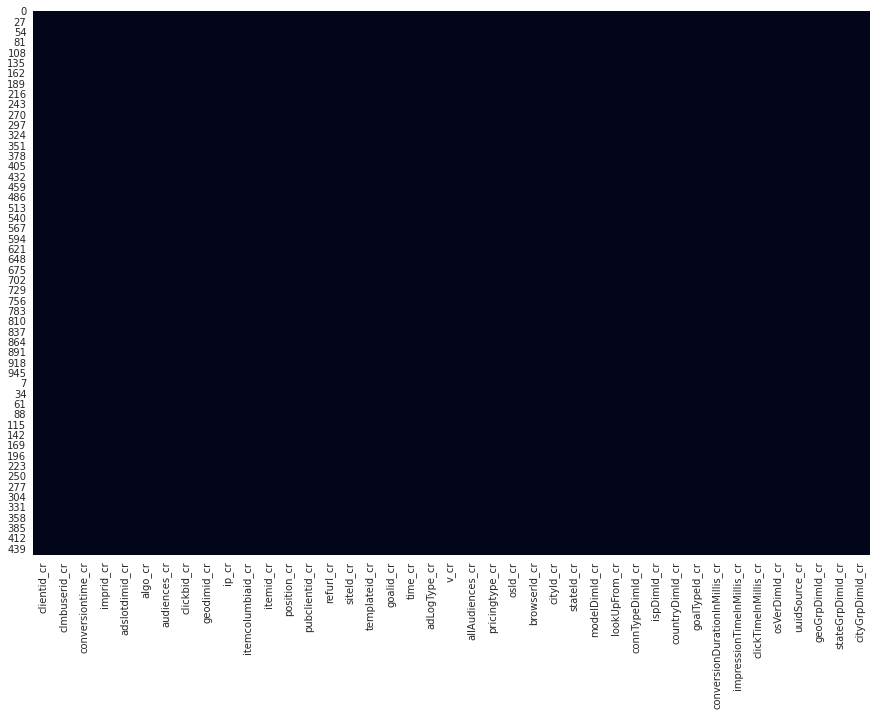

In [35]:
sns.heatmap(combined_data.isnull(), cbar=False)

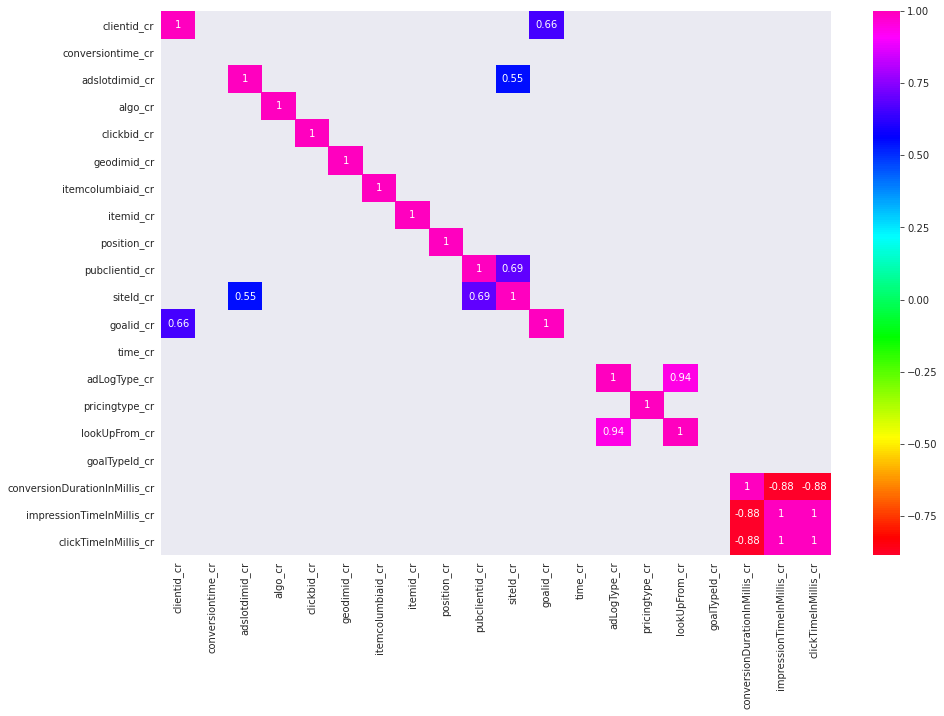

In [36]:
cor = combined_data.corr()
sns.heatmap(cor[(cor>=0.5) | (cor<=-0.5)], annot=True, cmap='gist_rainbow')

In [37]:
#we'll be dropping adLogType_cr and lookUpFrom_cr cols as they are highly correlated
combined_data = combined_data.drop(['adLogType_cr','lookUpFrom_cr'], axis=1)

In [38]:
combined_data.shape

(1420, 39)

In [39]:
catergorical_cols = combined_data.select_dtypes(include='object')
numeric_cols = combined_data.select_dtypes(include=np.number)

In [40]:
dummy_encoded  = pd.get_dummies(catergorical_cols, drop_first=True)

In [41]:
final_data = pd.concat([numeric_cols,dummy_encoded],axis=1)

In [42]:
final_data.head()

clientid_cr  conversiontime_cr  adslotdimid_cr  algo_cr  clickbid_cr  \
0        75694       1.620000e+12          321300     38.0     2.869316   
1        75694       1.620000e+12          129239     38.0     2.790000   
2        75694       1.620000e+12          321554     21.0     2.790000   
3        75694       1.620000e+12          321300     38.0     2.790000   
4        30431       1.620000e+12          355768     21.0     3.557986   

   geodimid_cr  itemcolumbiaid_cr  itemid_cr  position_cr  pubclientid_cr  \
0          144            5488088   49504155          1.0            2320   
1          144            5488773   49504157          1.0           15240   
2          144            5488088   49504160          1.0            2320   
3          144            5488088   49504155          1.0            2320   
4          144            5614054   53607445          1.0               1   

   siteId_cr  goalid_cr       time_cr  pricingtype_cr  goalTypeId_cr  \
0         34       6384  1.620000e+12              16             10   
1        178       6384  1.620000e+12              16             10   
2         34       6384  1.620000e+12              16             10   
3         34       6384  1.620000e+12              16             10   
4       3296       3370  1.620000e+12              17             10   

   conversionDurationInMillis_cr  impressionTimeInMillis_cr  \
0                         2332.0               1.620000e+12   
1                         3201.0               1.620000e+12   
2                         2821.0               1.620000e+12   
3                         3144.0               1.620000e+12   
4                        42597.0               1.620000e+12   

   clickTimeInMillis_cr  \
0          1.620000e+12   
1          1.620000e+12   
2          1.620000e+12   
3          1.620000e+12   
4          1.620000e+12   

   clmbuserid_cr_00df0f1c-748a-48ed-984d-af09840518c9-10waw  \
0                                                  0          
1                                                  0          
2                                                  0          
3                                                  0          
4                                                  0          

   clmbuserid_cr_00e1d1e0-6cf8-4ff3-8088-193f522a32c5-3qpg  \
0                                                  0         
1                                                  0         
2                                                  0         
3                                                  0         
4                                                  0         

   clmbuserid_cr_011bda14-df47-46ae-85e7-a853b0d13053-1sjr1  \
0                                                  0          
1                                                  0          
2                                                  0          
3                                                  0          
4                                                  0          

   clmbuserid_cr_01666a6c-262e-41b3-aeda-4d3fe6aa3a48-3qs8  \
0                                                  0         
1                                                  0         
2                                                  0         
3                                                  0         
4                                                  0         

   clmbuserid_cr_01677c7b-9b81-4dab-9d2b-0c3e4f9c7335-10uao  \
0                                                  0          
1                                                  0          
2                                                  0          
3                                                  0          
4                                                  0          

   clmbuserid_cr_01866432-2c42-4aba-a8ab-d2dd51b78f96-10u2c  \
0                                                  0          
1                                                  0          
2                                         

In [43]:
final_data.shape

(1420, 5715)

In [44]:
train = final_data.iloc[:965]
train.shape

(965, 5715)

In [45]:
test = final_data.iloc[965:]
test.shape

(455, 5715)

In [46]:
from sklearn.metrics import confusion_matrix
def confusion_mat(model,y_predict,y_test):
    cd = confusion_matrix(y_predict,y_test)
    pa = pd.DataFrame(cd, columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
    sns.heatmap(pa, annot=True,fmt='d', cbar=True)
    plt.show()
   

In [47]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

def roc(y_predic, y_test):
    fpr, tpr, threshold = roc_curve(y_predic,y_test)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],'r--')
    plt.text(x=0.1,y=0.7,s =('AUC Score', round(roc_auc_score(y_predic,y_test),2)))

def report(y_predic, y_test):
    return(classification_report(y_predic,y_test))
             

In [48]:
from sklearn import metrics

score = pd.DataFrame(columns=['Model','AUC Score','Precision','Recall','Accuracy Score','Kappa Score','F1 Score'])

def update_score(model,y_predic,y_test):
    global score
    
    score = score.append({
        'Model': model,
        'AUC Score': metrics.roc_auc_score(y_predic,y_test),
        'Precision':metrics.precision_score(y_predic,y_test),
        'Recall': metrics.recall_score(y_predic,y_test),
        'Accuracy Score': metrics.accuracy_score(y_predic,y_test),
        'Kappa Score': metrics.cohen_kappa_score(y_predic,y_test),
        'F1 Score': metrics.f1_score(y_predic,y_test)
    }, ignore_index=True)

In [49]:
from sklearn.model_selection import train_test_split

X = train
Y = target
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.4, random_state=10)

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
model1 = rf.fit(X_train,Y_train)

In [51]:
y_predicted = model1.predict(X_test)

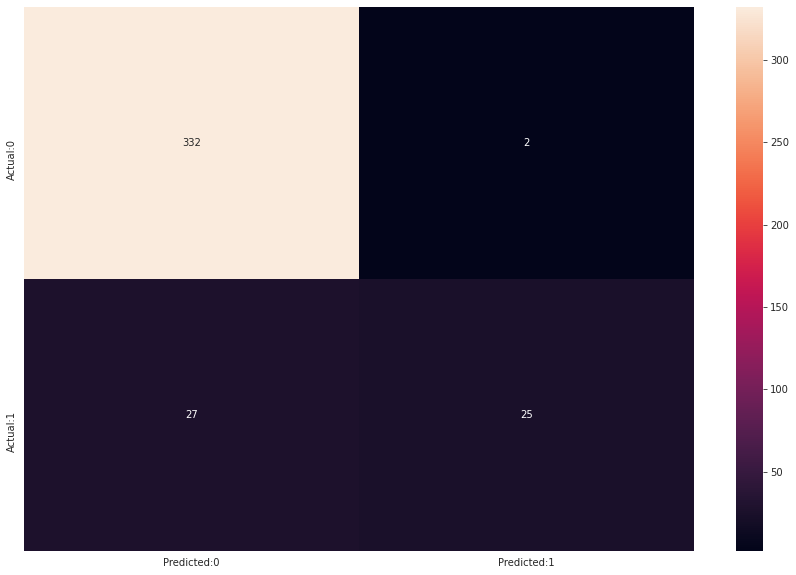

In [52]:
confusion_mat('RandomForest',Y_test,y_predicted)

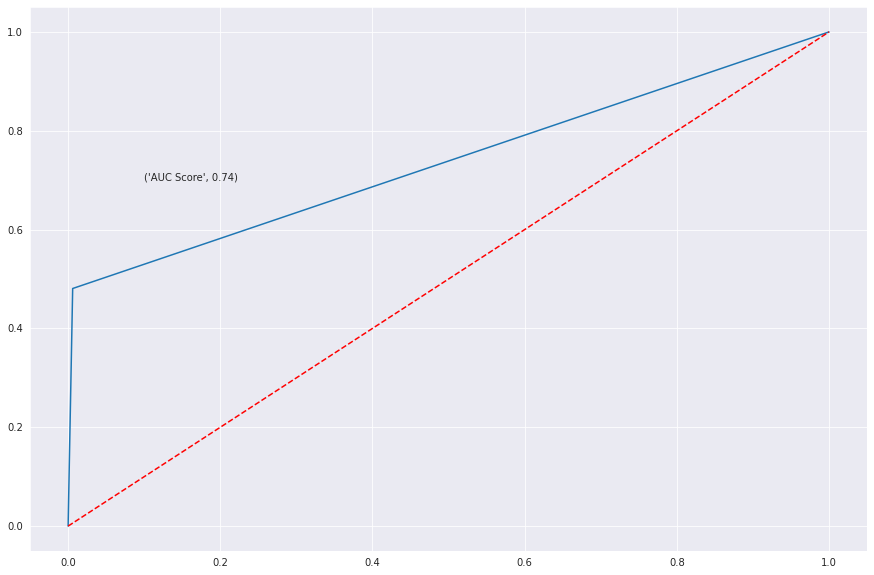

In [53]:
roc(Y_test,y_predicted)

In [54]:
print(report(Y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       334
           1       0.93      0.48      0.63        52

    accuracy                           0.92       386
   macro avg       0.93      0.74      0.80       386
weighted avg       0.92      0.92      0.91       386



In [55]:
update_score('RandomForest',Y_test,y_predicted)

In [56]:
score

Model  AUC Score  Precision    Recall  Accuracy Score  Kappa Score  \
0  RandomForest   0.737391   0.925926  0.480769         0.92487      0.59568   

   F1 Score  
0  0.632911

In [57]:
from sklearn.tree import DecisionTreeClassifier
mod = DecisionTreeClassifier(criterion='entropy', random_state=1)
model2 = mod.fit(X_train,Y_train)

model2_predicted = model2.predict(X_test)

from sklearn import tree
labels = X_train.columns
fig = plt.figure(figsize=(30,30))
a = tree.plot_tree(model2,feature_names=labels,class_names=["0","1"], filled=True)


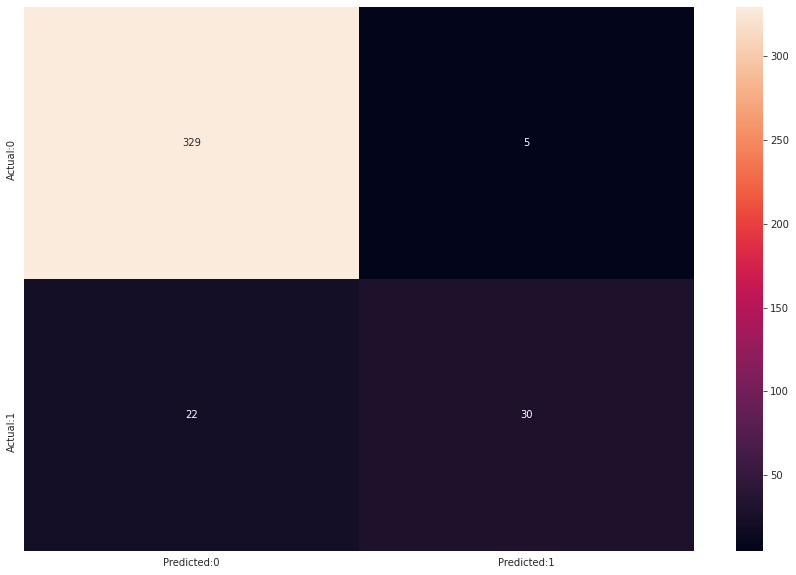

In [58]:
confusion_mat('DecisionTree',Y_test,model2_predicted)

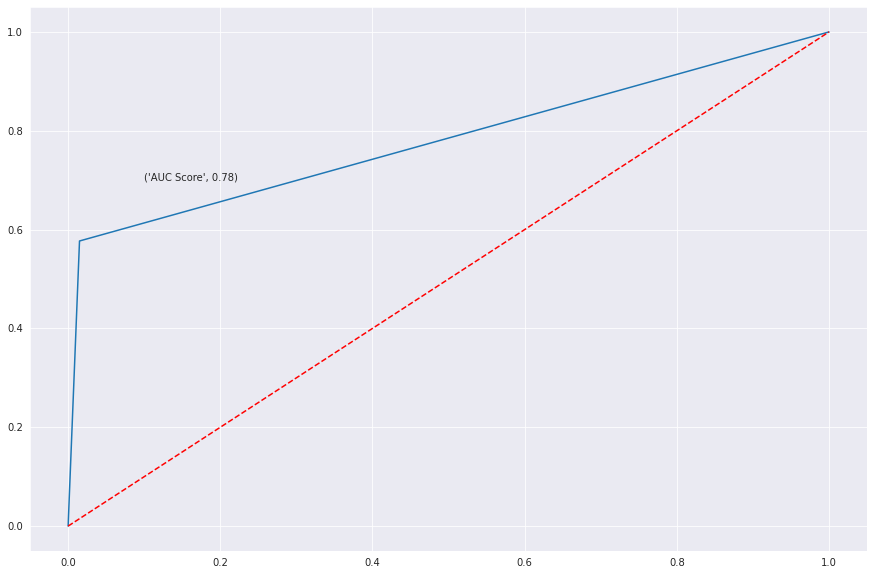

In [59]:
roc(Y_test,model2_predicted)

In [60]:
print(report(Y_test,model2_predicted))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       334
           1       0.86      0.58      0.69        52

    accuracy                           0.93       386
   macro avg       0.90      0.78      0.83       386
weighted avg       0.93      0.93      0.92       386



In [61]:
update_score('DecisionTree',Y_test,model2_predicted)

In [62]:
score

Model  AUC Score  Precision    Recall  Accuracy Score  Kappa Score  \
0  RandomForest   0.737391   0.925926  0.480769        0.924870     0.595680   
1  DecisionTree   0.780977   0.857143  0.576923        0.930052     0.651927   

   F1 Score  
0  0.632911  
1  0.689655

In [64]:
#pruning decision tree
tuned_params = [{'criterion':['gini','entropy'],
                  'min_samples_split':[100,200,400],
                  'max_leaf_nodes':[40,60,80,90]}]

In [65]:
from sklearn.model_selection import GridSearchCV
dec = DecisionTreeClassifier(random_state=1)

grid = GridSearchCV(estimator=dec,param_grid = tuned_params, cv=10)

In [66]:
gr = grid.fit(X_train,Y_train)

In [67]:
gr.best_params_

{'criterion': 'gini', 'max_leaf_nodes': 40, 'min_samples_split': 100}

In [68]:
mod2 = DecisionTreeClassifier(criterion = gr.best_params_.get('criterion'),
                             max_leaf_nodes = gr.best_params_.get('max_leaf_nodes'),
                             min_samples_split= gr.best_params_.get('min_samples_split'))

In [69]:
model3 = mod2.fit(X_train,Y_train)

In [71]:
model3_predicted = model3.predict(X_test)

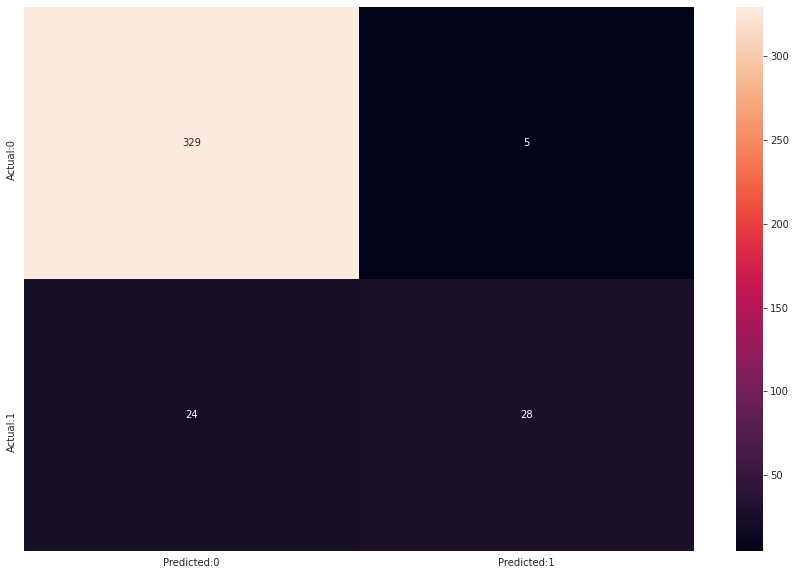

In [72]:
confusion_mat('DecisionTree_pruned',Y_test,model3_predicted)

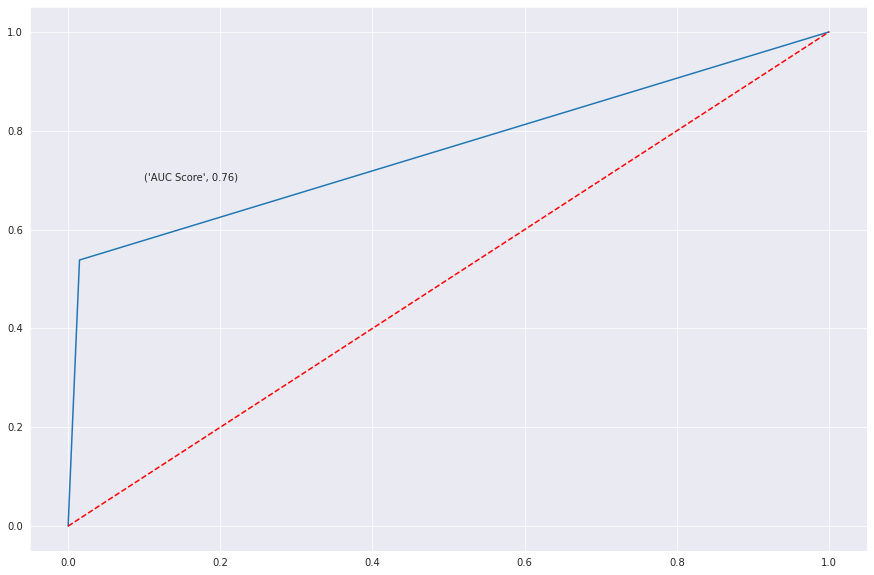

In [73]:
roc(Y_test,model3_predicted)

In [74]:
print(report(Y_test,model3_predicted))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       334
           1       0.85      0.54      0.66        52

    accuracy                           0.92       386
   macro avg       0.89      0.76      0.81       386
weighted avg       0.92      0.92      0.92       386



In [75]:
update_score('DecisionTree_pruned',Y_test,model3_predicted)

In [76]:
score

Model  AUC Score  Precision    Recall  Accuracy Score  \
0         RandomForest   0.737391   0.925926  0.480769        0.924870   
1         DecisionTree   0.780977   0.857143  0.576923        0.930052   
2  DecisionTree_pruned   0.761746   0.848485  0.538462        0.924870   

   Kappa Score  F1 Score  
0     0.595680  0.632911  
1     0.651927  0.689655  
2     0.618967  0.658824

In [77]:
#pruning Random Forest
tuned_parameters = [{
    'n_estimators':[100,150,200,250,300],
    'min_samples_split':[100,150,200,250,300]
}]

In [78]:
reg = RandomForestClassifier()
grd = GridSearchCV(estimator=reg, param_grid= tuned_parameters, cv=10)
mo = grd.fit(X_train,Y_train)

In [79]:
mo.best_params_

{'min_samples_split': 100, 'n_estimators': 200}

In [80]:
mod_RF = RandomForestClassifier(n_estimators= mo.best_params_.get('n_estimators'), min_samples_split=mo.best_params_.get('min_samples_split'))
model_4 = mod_RF.fit(X_train,Y_train)

In [81]:
model4_predicted = model_4.predict(X_test)

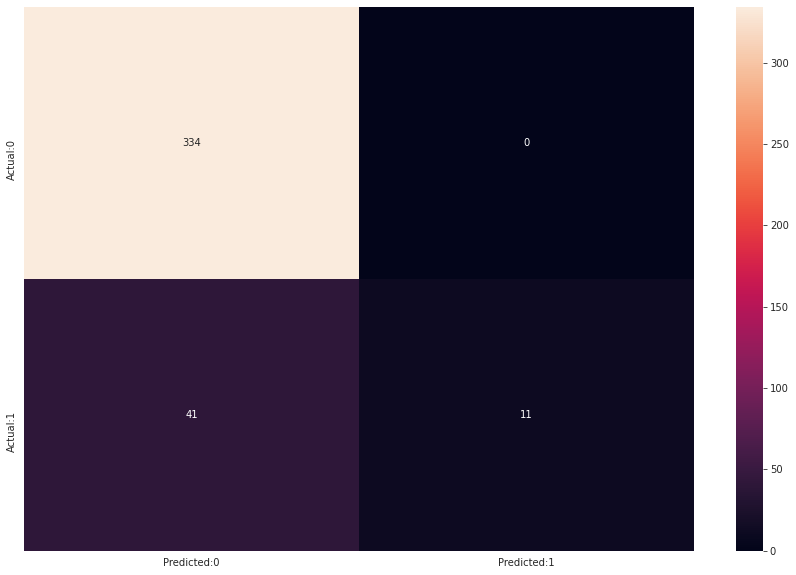

In [82]:
confusion_mat('RandomForest_pruned',Y_test,model4_predicted)

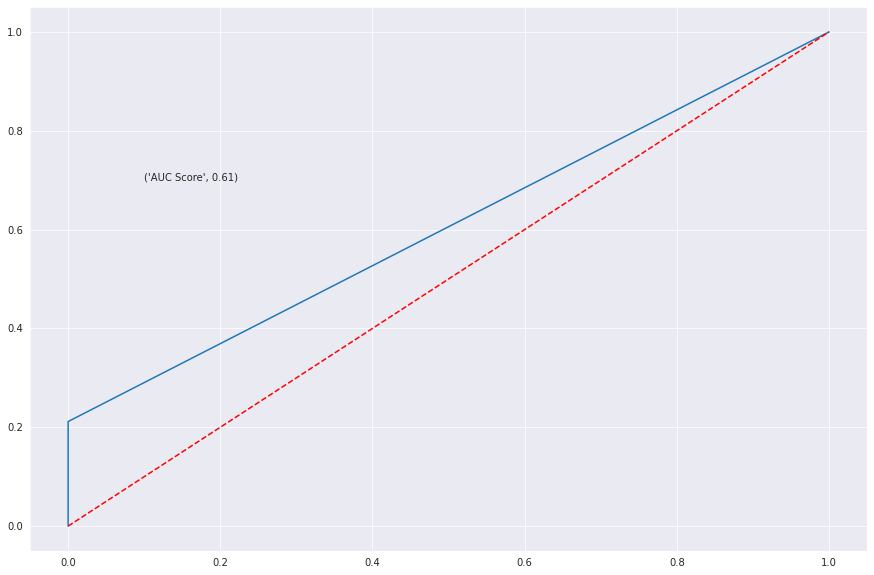

In [83]:
roc(Y_test,model4_predicted)

In [84]:
print(report(Y_test,model4_predicted))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       334
           1       1.00      0.21      0.35        52

    accuracy                           0.89       386
   macro avg       0.95      0.61      0.65       386
weighted avg       0.91      0.89      0.86       386



In [85]:
update_score('RandomForest_pruned_2',Y_test,model4_predicted)

In [86]:
score

Model  AUC Score  Precision    Recall  Accuracy Score  \
0           RandomForest   0.737391   0.925926  0.480769        0.924870   
1           DecisionTree   0.780977   0.857143  0.576923        0.930052   
2    DecisionTree_pruned   0.761746   0.848485  0.538462        0.924870   
3  RandomForest_pruned_2   0.605769   1.000000  0.211538        0.893782   

   Kappa Score  F1 Score  
0     0.595680  0.632911  
1     0.651927  0.689655  
2     0.618967  0.658824  
3     0.317079  0.349206

In [87]:
from imblearn.over_sampling import SMOTE

In [88]:
X = train
Y = target

In [89]:
over_sample = SMOTE()
X,Y = over_sample.fit_resample(X,Y)

In [90]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.4, random_state=10)

In [91]:
mod5 = RandomForestClassifier()
model5 = mod5.fit(X_train,Y_train)

In [92]:
model5_predicted = model5.predict(X_test)

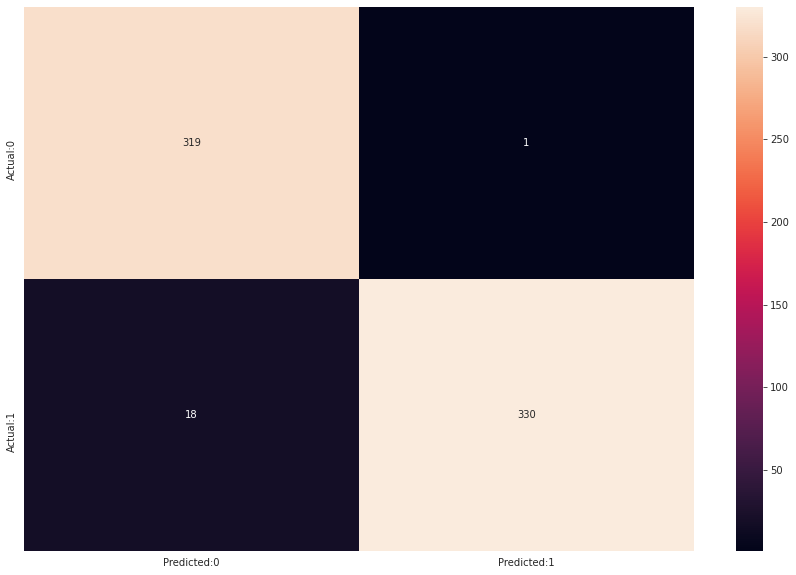

In [93]:
confusion_mat('RandomForest_With_resampling',Y_test,model5_predicted)

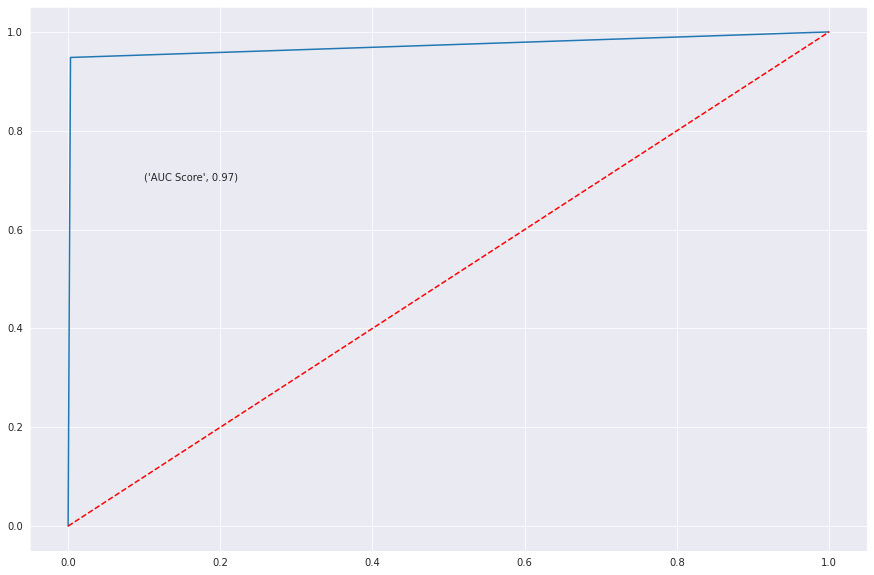

In [94]:
roc(Y_test,model5_predicted)

In [95]:
print(report(Y_test,model5_predicted))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       320
           1       1.00      0.95      0.97       348

    accuracy                           0.97       668
   macro avg       0.97      0.97      0.97       668
weighted avg       0.97      0.97      0.97       668



In [96]:
update_score('RandomForest_With_resampling',Y_test,model5_predicted)

In [97]:
score

Model  AUC Score  Precision    Recall  \
0                  RandomForest   0.737391   0.925926  0.480769   
1                  DecisionTree   0.780977   0.857143  0.576923   
2           DecisionTree_pruned   0.761746   0.848485  0.538462   
3         RandomForest_pruned_2   0.605769   1.000000  0.211538   
4  RandomForest_With_resampling   0.972575   0.996979  0.948276   

   Accuracy Score  Kappa Score  F1 Score  
0        0.924870     0.595680  0.632911  
1        0.930052     0.651927  0.689655  
2        0.924870     0.618967  0.658824  
3        0.893782     0.317079  0.349206  
4        0.971557     0.943135  0.972018

In [98]:
from sklearn.svm import SVC

In [99]:
mod6 = SVC(kernel='rbf', gamma='auto', degree=3)

In [100]:
model6 = mod6.fit(X_train,Y_train)

In [102]:
model6_predicted = mod6.predict(X_test)

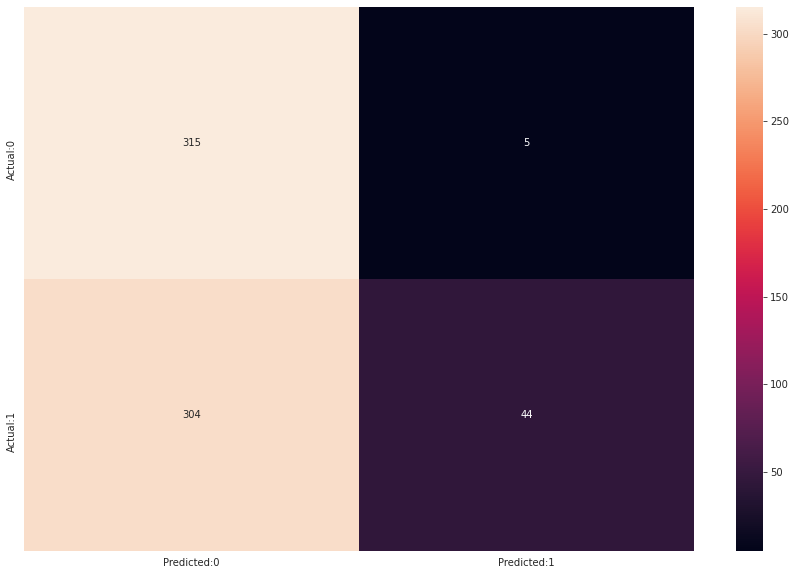

In [103]:
confusion_mat('SVM_with_resampling',Y_test,model6_predicted)

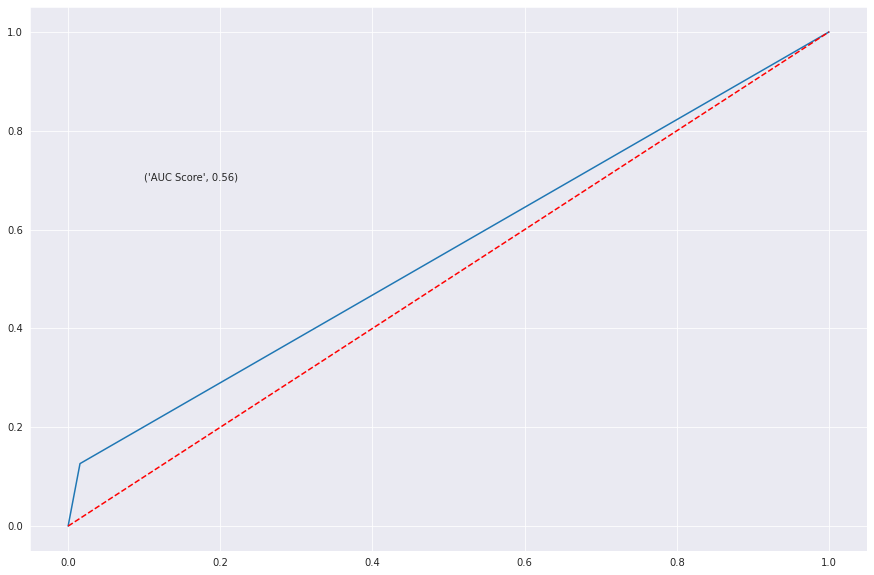

In [104]:
roc(Y_test,model6_predicted)

In [105]:
print(report(Y_test,model6_predicted))

              precision    recall  f1-score   support

           0       0.51      0.98      0.67       320
           1       0.90      0.13      0.22       348

    accuracy                           0.54       668
   macro avg       0.70      0.56      0.45       668
weighted avg       0.71      0.54      0.44       668



In [106]:
update_score('SVM_with_resampling',Y_test,model6_predicted)

In [107]:
score

Model  AUC Score  Precision    Recall  \
0                  RandomForest   0.737391   0.925926  0.480769   
1                  DecisionTree   0.780977   0.857143  0.576923   
2           DecisionTree_pruned   0.761746   0.848485  0.538462   
3         RandomForest_pruned_2   0.605769   1.000000  0.211538   
4  RandomForest_With_resampling   0.972575   0.996979  0.948276   
5           SVM_with_resampling   0.555406   0.897959  0.126437   

   Accuracy Score  Kappa Score  F1 Score  
0        0.924870     0.595680  0.632911  
1        0.930052     0.651927  0.689655  
2        0.924870     0.618967  0.658824  
3        0.893782     0.317079  0.349206  
4        0.971557     0.943135  0.972018  
5        0.537425     0.106797  0.221662

<h2>Conclusion</h2>
<p> from the above results the Model5 ie., RandomForest_With_resampling can be choosen the best fit model since the accuracy score, precision and even the other metrics of this model is better than any other model.</p>

<h3>Below is the code to generate the output excel for the test data with the predicted results</h3>

In [113]:
test_prediction = model5.predict(test)

In [115]:
output = pd.DataFrame()
aux = pd.read_csv('/content/drive/MyDrive/Capstone Project/Test Data.csv')
output['record_id'] = aux['record_id']
output['conversion_fraud'] = test_prediction
output[['record_id','conversion_fraud']].to_csv('/content/drive/MyDrive/Capstone Project/test1.csv')